# Average Age Analysis of Female Olympic Athletes

## Analysis
My beginning question was what is the average age of a Female Olympian and does this average age change depending on the country? (Due to time constraints, I only focused on China, Russia, and Japan)

The initial CSV was created to record everyone that competed in the Olympics from 1896 to 2016. To perform data cleanup, I initially narrowed it down to the specific country that I wanted to analyze and drop. After this, I added a filter to only pull the female Olympian data and dropped any duplicated information. In this case, the duplicates occurred due to an athlete having competed in multiple events in the same Olympics. In this way, I was able to keep my data from being skewed.

According to scholarly articles, 26.1 is the average age of peak performance in Olympic Athletes. This is an average value that does tend to fluctuate depending on the sport itself with a range of anywhere between 21 to 27 years old. After reviewing the overall Ages for Olympians from 1896 to 2016, I was able use the data cleanup method described above to create a line graph that compares the average ages of the Male and Female Olympians from the United States. This graph shows a clear distinction of at least 1-2 years. The analysis conveyed that Male Olympians have an average age of 26.4 and Females have an average age of 24.7.

After finding this data, I then used matplotlib to create line graphs to compare the US Female Olympian Age data to China, Russia, and Japan. Each country showed roughly the same trend of having younger female Olympians than the US did. The most notable of these graphs was the comparison between China and the US with the average female Chinese Olympian age having an average age of 22.8. Both Russia and Japan showed similar trends until roughly 2005 where the average became almost identical between the three countries. Female Russian Olympians had an average age of 25.0 while female Japanese Olympians had an average age of 22.4 due to several decades having younger female teams like the Chinese team.

Due to time limitations, I was unable to continue developing my analysis. I would have liked to analyze Average Age of Females who Won Gold as well as analyze of the Average Age of Female Olympians for each individual sport as well.


### Data Clean Up and Filter to US Athlete Data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import decimal

In [3]:
# CSV file path
file = "Resources/original_olympic_data.csv"

# Read data into pandas
df = pd.read_csv(file)
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
#Take Column information to filter 
starter_age_df = df.loc[:, ['ID','Sex', 'Age',
                            'NOC', 'Year']]
starter_age_df.head(10)

,ID,Sex,Age,NOC,Year
0,1,M,24.0,CHN,1992
1,2,M,23.0,CHN,2012
2,3,M,24.0,DEN,1920
3,4,M,34.0,DEN,1900
4,5,F,21.0,NED,1988
5,5,F,21.0,NED,1988
6,5,F,25.0,NED,1992
7,5,F,25.0,NED,1992
8,5,F,27.0,NED,1994
9,5,F,27.0,NED,1994


In [6]:
starter_age_df.count()

ID      271116
Sex     271116
Age     261642
NOC     271116
Year    271116
dtype: int64

In [7]:
#Select only US participants
us_filter = starter_age_df[(starter_age_df["NOC"] == "USA")]
us_reduced = us_filter.dropna(how='any')
us_reduced.head(10)

,ID,Sex,Age,NOC,Year
10,6,M,31.0,USA,1992
11,6,M,31.0,USA,1992
12,6,M,31.0,USA,1992
13,6,M,31.0,USA,1992
14,6,M,33.0,USA,1994
15,6,M,33.0,USA,1994
16,6,M,33.0,USA,1994
17,6,M,33.0,USA,1994
18,7,M,31.0,USA,1992
19,7,M,31.0,USA,1992


In [8]:
us_reduced.count()

ID      18555
Sex     18555
Age     18555
NOC     18555
Year    18555
dtype: int64

In [9]:
#Cleaning data to delete duplicate athletes 
us_reduced["USA_Age"] = us_reduced['ID'].map(str) + us_reduced['Age'].map(str)
us_reduced["USA_Age"].duplicated().sum()
us_reduced.duplicated(subset = ["USA_Age"]).sum()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


5860

In [10]:
#Creating Clean dataframe 
clean_graph = us_reduced.drop_duplicates(subset = ["USA_Age"])
clean_graph  = clean_graph .set_index("USA_Age")
clean_graph 

,ID,Sex,Age,NOC,Year
USA_Age,,,,,
631.0,6,M,31.0,USA,1992
633.0,6,M,33.0,USA,1994
731.0,7,M,31.0,USA,1992
733.0,7,M,33.0,USA,1994
8426.0,84,M,26.0,USA,2004
...,...,...,...,...,...
13543328.0,135433,M,28.0,USA,1996
13545827.0,135458,M,27.0,USA,2004
13545831.0,135458,M,31.0,USA,2008


In [11]:
clean_graph.count()

ID      12695
Sex     12695
Age     12695
NOC     12695
Year    12695
dtype: int64

### Average Age of Female Olympic Athletes

In [12]:
#Filtering data for Male and Femal US Olympians 
fem_filter = us_reduced[(starter_age_df["Sex"] == "F")]
male_filter = us_reduced[(starter_age_df["Sex"] == "M")]

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#Filtering to get average age of Female Olympians by Year
female_age_year = fem_filter.groupby(["Year"])
age_count = female_age_year['Age'].mean()
fem_age_final = pd.DataFrame(data=age_count)
us_women_age = fem_age_final.reset_index()
us_women_age

,Year,Age
0,1900,26.222222
1,1904,50.230769
2,1920,20.272727
3,1924,21.864865
4,1928,24.050847
5,1932,33.000000
6,1936,23.030303
7,1948,22.064935
8,1952,24.025862
9,1956,19.921739


In [14]:
us_women_age.mean()

Year    1972.387097
Age       24.777991
dtype: float64

In [15]:
#Filtering to get average age of Male Olympians by year 
male_age_year = male_filter.groupby(["Year"])
male_age_count = male_age_year['Age'].mean()
male_age_final = pd.DataFrame(data=male_age_count)
us_men_age = male_age_final.reset_index()
us_men_age

,Year,Age
0,1896,23.074074
1,1900,24.264463
2,1904,26.661327
3,1906,24.913580
4,1908,26.364486
5,1912,28.132597
6,1920,27.527840
7,1924,26.947939
8,1928,29.612245
9,1932,35.636914


In [16]:
us_men_age.mean()

Year    1964.742857
Age       26.348437
dtype: float64

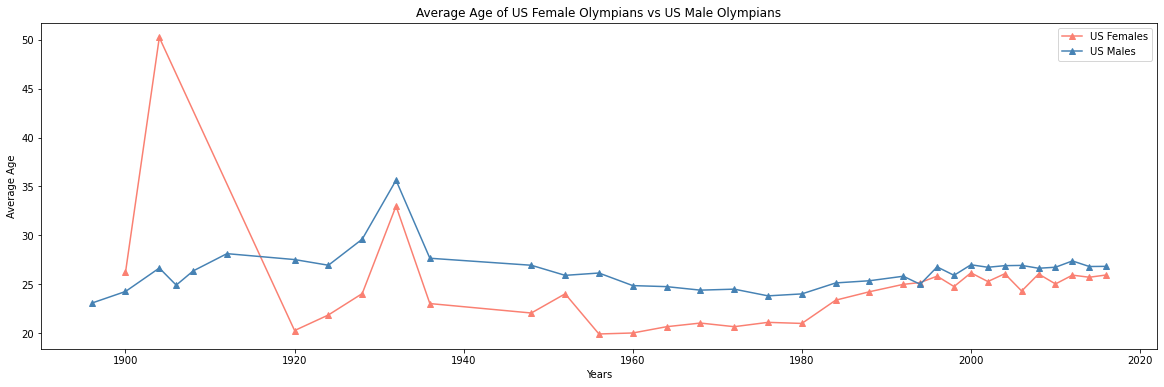

In [17]:
#Creating line chart for comparison of Male vs Female US Olympians 
us_women = us_women_age
us_men = us_men_age

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

plt.plot(us_women['Year'], us_women['Age'], marker = '^', color='salmon', label= "US Females")
plt.plot(us_men['Year'], us_men['Age'], marker = '^', color='steelblue', label= "US Males")

plt.xlabel("Years")
plt.ylabel("Average Age")
plt.title("Average Age of US Female Olympians vs US Male Olympians")
plt.legend(loc="upper right")


plt.show()

### How does China compare to the US Average Female Age?

In [18]:
#Filtering for Chinese Olympians 
chn_filter = starter_age_df[(starter_age_df["NOC"] == "CHN")]
chn_reduced = chn_filter.dropna(how='any')
chn_reduced.head(10)

,ID,Sex,Age,NOC,Year
0,1,M,24.0,CHN,1992
1,2,M,23.0,CHN,2012
1072,602,M,22.0,CHN,2000
2611,1463,M,25.0,CHN,2004
2612,1464,F,14.0,CHN,2016
2613,1464,F,14.0,CHN,2016
6427,3605,M,22.0,CHN,2006
6428,3605,M,22.0,CHN,2006
6433,3610,M,19.0,CHN,1998
6434,3610,M,19.0,CHN,1998


In [19]:
#Finding duplicates
chn_reduced["CHN_Age"] = chn_reduced['ID'].map(str) + chn_reduced['Age'].map(str)
chn_reduced["CHN_Age"].duplicated().sum()
chn_reduced.duplicated(subset = ["CHN_Age"]).sum()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1532

In [20]:
#Creating Clean dataset without duplicates 
clean_chn = chn_reduced.drop_duplicates(subset = ["CHN_Age"])
clean_chn  = clean_chn  .set_index("CHN_Age")

In [21]:
#Adding filter for Female Chinese Olympians 
chn_fem_filter = chn_reduced[(starter_age_df["Sex"] == "F")]
chn_fem_filter.count()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


ID         2770
Sex        2770
Age        2770
NOC        2770
Year       2770
CHN_Age    2770
dtype: int64

In [22]:
#Filtering to get average age of Female Chinese Olympians by year 
chn_age = clean_chn.groupby(["Year"])
chn_count = chn_age['Age'].mean()
chn_age_final = pd.DataFrame(data=chn_count)
women_age_chn = chn_age_final.reset_index()
women_age_chn

,Year,Age
0,1932,22.000000
1,1936,23.555556
2,1948,29.750000
3,1952,23.000000
4,1980,21.083333
5,1984,22.567460
6,1988,22.961538
7,1992,22.778986
8,1994,20.250000
9,1996,23.071429


In [23]:
women_age_chn.mean()

Year    1988.600000
Age       23.326671
dtype: float64

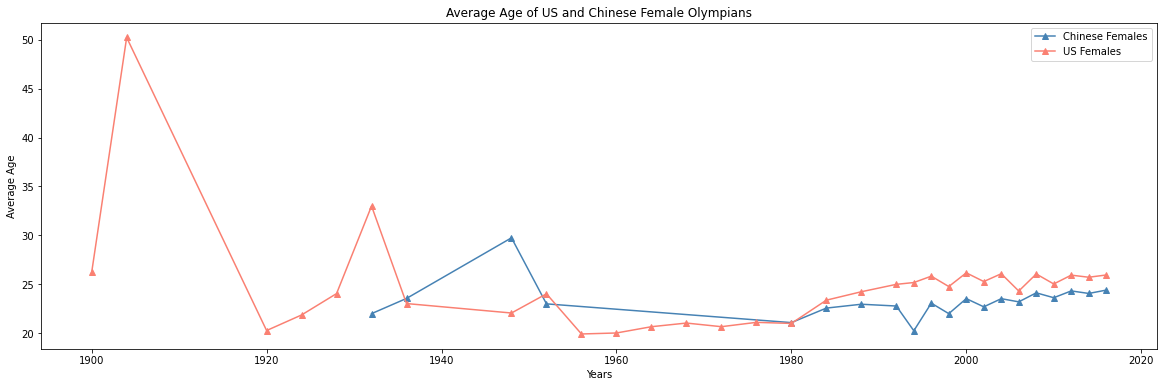

In [24]:
#Creating line chart for comparison of US Female vs Chinese Female Olympians
women_chn = women_age_chn
us_women = us_women_age

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

plt.plot(women_chn['Year'], women_chn['Age'], marker = '^', color='steelblue', label= "Chinese Females")
plt.plot(us_women['Year'], us_women['Age'], marker = '^', color='salmon', label= "US Females")

plt.xlabel("Years")
plt.ylabel("Average Age")
plt.title("Average Age of US and Chinese Female Olympians")
plt.legend(loc="upper right")
plt.show()

### How does Russia compare to the US Average Female Age?

In [25]:
#Filtering for Russian Olympians 
rus_filter = starter_age_df[(starter_age_df["NOC"] == "RUS")]
rus_reduced = rus_filter.dropna(how='any')
rus_reduced.head(10)

,ID,Sex,Age,NOC,Year
163,67,F,22.0,RUS,2008
164,67,F,26.0,RUS,2012
195,90,F,21.0,RUS,2004
196,90,F,21.0,RUS,2004
615,356,M,26.0,RUS,2016
779,449,F,26.0,RUS,2008
788,455,M,19.0,RUS,2012
789,455,M,19.0,RUS,2012
790,455,M,19.0,RUS,2012
791,455,M,19.0,RUS,2012


In [26]:
#Finding duplicates
rus_reduced["RUS_Age"] = rus_reduced['ID'].map(str) + rus_reduced['Age'].map(str)
rus_reduced["RUS_Age"].duplicated().sum()
rus_reduced.duplicated(subset = ["RUS_Age"]).sum()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1564

In [27]:
#Creating Clean dataset without duplicates 
clean_rus = rus_reduced.drop_duplicates(subset = ["RUS_Age"])
clean_rus=clean_rus.set_index("RUS_Age")

In [28]:
#Adding filter for Female Russian Olympians 
rus_fem_filter = rus_reduced[(starter_age_df["Sex"] == "F")]
rus_fem_filter.count()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


ID         2188
Sex        2188
Age        2188
NOC        2188
Year       2188
RUS_Age    2188
dtype: int64

In [29]:
#Filtering to get average age of Female, Russian Olympians by year 
rus_age = rus_fem_filter.groupby(["Year"])
rus_count = rus_age['Age'].mean()
rus_age_final = pd.DataFrame(data=rus_count)
women_age_rus = rus_age_final.reset_index()
women_age_rus

,Year,Age
0,1994,23.678571
1,1996,23.343348
2,1998,25.026667
3,2000,24.405204
4,2002,25.558824
5,2004,25.596226
6,2006,26.558559
7,2008,24.691228
8,2010,25.904762
9,2012,24.943463


In [30]:
women_age_rus.mean()

Year    2005.000000
Age       24.958238
dtype: float64

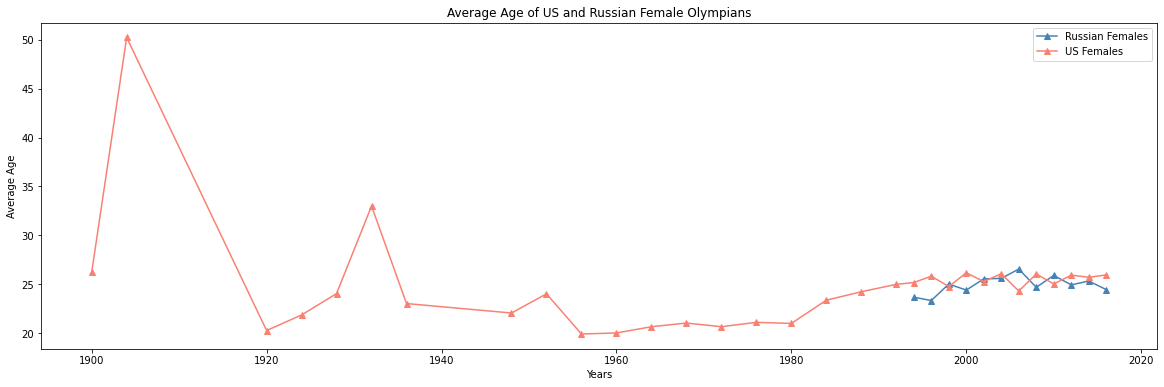

In [31]:
#Creating line chart for comparison of US Female vs Russian Female Olympians
women_rus = women_age_rus
us_women = us_women_age

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

plt.plot(women_rus['Year'], women_rus['Age'], marker = '^', color='steelblue', label= "Russian Females")
plt.plot(us_women['Year'], us_women['Age'], marker = '^', color='salmon', label= "US Females")

plt.xlabel("Years")
plt.ylabel("Average Age")
plt.title("Average Age of US and Russian Female Olympians")
plt.legend(loc="upper right")

plt.show()

### How does Japan compare to the US Average Female Age?

In [32]:
#Filtering for Japanese Olympians 
jpn_filter = starter_age_df[(starter_age_df["NOC"] == "JPN")]
jpn_reduced = jpn_filter.dropna(how='any')
jpn_reduced.head(10)

,ID,Sex,Age,NOC,Year
625,362,M,24.0,JPN,1936
626,363,M,24.0,JPN,1972
627,363,M,24.0,JPN,1972
628,363,M,28.0,JPN,1976
629,363,M,28.0,JPN,1976
630,364,M,25.0,JPN,1960
631,365,M,23.0,JPN,1992
632,366,M,25.0,JPN,1972
633,367,M,22.0,JPN,1988
634,367,M,22.0,JPN,1988


In [33]:
#Finding duplicates
jpn_reduced["JPN_Age"] = jpn_reduced['ID'].map(str) + jpn_reduced['Age'].map(str)
jpn_reduced["JPN_Age"].duplicated().sum()
jpn_reduced.duplicated(subset = ["JPN_Age"]).sum()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2978

In [34]:
#Creating Clean dataset without duplicates 
clean_jpn = jpn_reduced.drop_duplicates(subset = ["JPN_Age"])
clean_jpn=clean_jpn.set_index("JPN_Age")

In [35]:
#Adding filter for Female Japanese Olympians 
jpn_fem_filter = jpn_reduced[(starter_age_df["Sex"] == "F")]
jpn_fem_filter.count()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


ID         2771
Sex        2771
Age        2771
NOC        2771
Year       2771
JPN_Age    2771
dtype: int64

In [36]:
#Filtering to get average age of Female, Japanese Olympians by year 
jpn_age = jpn_fem_filter.groupby(["Year"])
jpn_count = jpn_age['Age'].mean()
jpn_age_final = pd.DataFrame(data=jpn_count)
women_age_jpn = jpn_age_final.reset_index()
women_age_jpn

,Year,Age
0,1928,21.000000
1,1932,17.727273
2,1936,18.708333
3,1952,18.764706
4,1956,21.327586
5,1960,22.013699
6,1964,23.239316
7,1968,20.773810
8,1972,21.889831
9,1976,20.983193


In [37]:
women_age_jpn.mean()

Year    1982.615385
Age       22.390286
dtype: float64

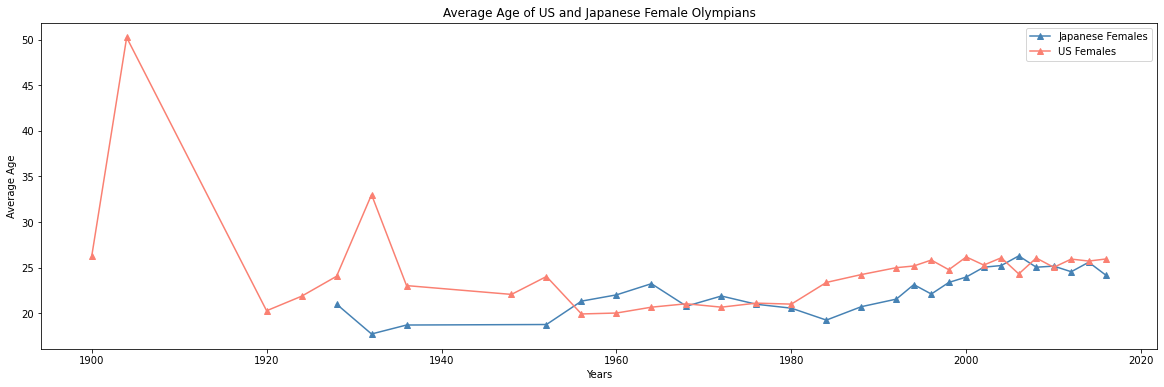

In [39]:
#Creating line chart for comparison of US Female vs Japanese Female Olympians
women_jpn = women_age_jpn
us_women = us_women_age

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

plt.plot(women_jpn['Year'], women_jpn['Age'], marker = '^', color= 'steelblue', label= "Japanese Females")
plt.plot(us_women['Year'], us_women['Age'], marker = '^', color='salmon', label= "US Females")

plt.xlabel("Years")
plt.ylabel("Average Age")
plt.title("Average Age of US and Japanese Female Olympians")
plt.legend(loc="upper right")

plt.show()